In [1]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [2]:
# Paso 2: Cargar los datos desde GitHub
url = "https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/datos_economicos.xlsx"
data = pd.read_excel(url)

# Variables derivadas
data['interaccion'] = data['tasa_desempleo'] * data['crecimiento_pib']
data['desempleo_alto'] = (data['tasa_desempleo'] > data['tasa_desempleo'].median()).astype(int)

# Variables predictoras y objetivo
X = data[['tasa_desempleo', 'crecimiento_pib', 'interaccion', 'desempleo_alto']]
y = data['crisis_economica']



In [3]:
# Paso 3: Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
# Paso 4: Entrenar modelos
# Regresión Logística
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred_log = logit.predict(X_test)
y_prob_log = logit.predict_proba(X_test)[:, 1]

# Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

In [5]:
# Paso 5: Crear DataFrame de resultados
df_resultados = X_test.copy()
df_resultados["Real"] = y_test.values
df_resultados["Logit_Pred"] = y_pred_log
df_resultados["Logit_Prob_crisis"] = y_prob_log
df_resultados["Arbol_Pred"] = y_pred_tree
df_resultados["Arbol_Prob_crisis"] = y_prob_tree
df_resultados["Error_Logit"] = df_resultados["Real"] - df_resultados["Logit_Pred"]
df_resultados["Error_Arbol"] = df_resultados["Real"] - df_resultados["Arbol_Pred"]

In [6]:
# Paso 6: Reportes de clasificación
print("\n--- Clasificación: Regresión Logística ---")
print(classification_report(y_test, y_pred_log))

print("\n--- Clasificación: Árbol de Decisión ---")
print(classification_report(y_test, y_pred_tree))


--- Clasificación: Regresión Logística ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.50      0.67         4

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0.91      0.90      0.89        20


--- Clasificación: Árbol de Decisión ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



A pesar de que el árbol de decisión muestra una aparente exactitud del 95%, sus métricas por clase (precisión, recall y F1-score) son extremadamente bajas, lo que indica que no está clasificando correctamente los casos individuales, especialmente los de crisis económica. 

Esto sugiere que el modelo podría estar sesgado hacia la clase mayoritaria, generando una falsa sensación de buen rendimiento.

En contraste, la regresión logística ofrece un rendimiento mucho más equilibrado y confiable. Con una precisión perfecta para detectar crisis (1.00) y un F1-score ponderado de 0.89, demuestra una capacidad sólida para distinguir entre escenarios de crisis y no crisis. 

Aunque su recall para crisis es de 0.50, sigue siendo significativamente más útil que el árbol de decisión, ya que cuando predice una crisis, acierta.

Por tanto, la regresión logística no solo es más robusta y precisa, sino que también es más adecuada para tareas sensibles como la predicción de crisis económicas, donde los errores pueden tener consecuencias importantes.

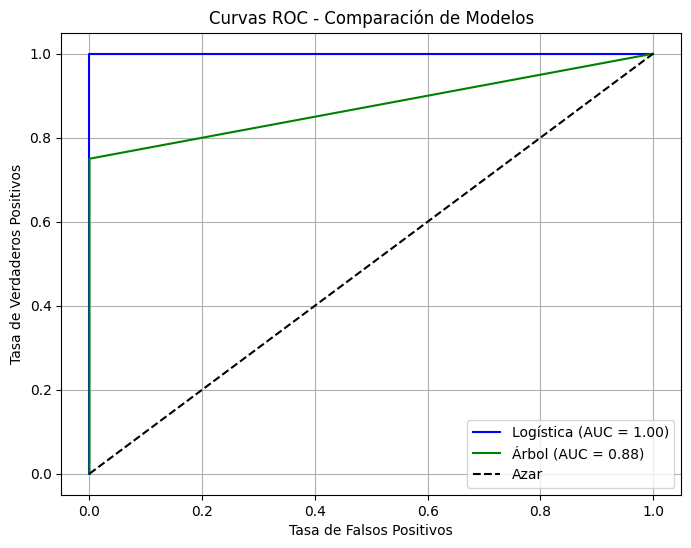

In [7]:
# Paso 7: Visualización - Curvas ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color="blue", label=f"Logística (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, color="green", label=f"Árbol (AUC = {roc_auc_tree:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Azar")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC - Comparación de Modelos")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

El modelo de regresión logística es claramente superior, con un AUC perfecto de 1.00, lo que indica que distingue perfectamente entre crisis y no crisis.

El árbol de decisión, aunque razonablemente bueno (AUC = 0.88), no alcanza el mismo nivel de precisión y puede cometer errores en la clasificación.

Esta visualización confirma y refuerza los resultados obtenidos en las métricas anteriores (precisión, recall, F1-score), consolidando a la regresión logística como el modelo más efectivo para este problema.

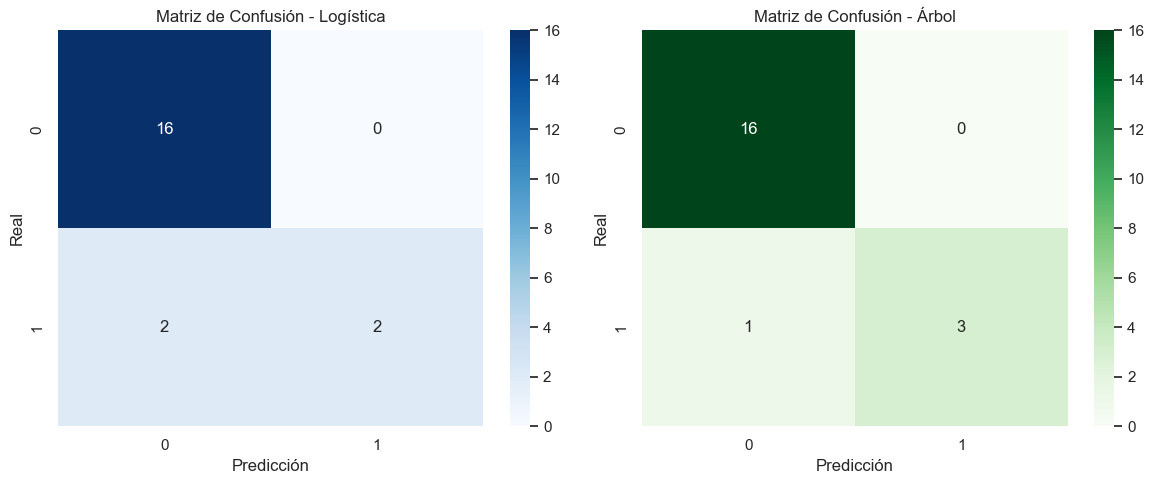

In [8]:
# Paso 8: Visualización - Matriz de confusión
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)

cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusión - Logística")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusión - Árbol")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

Ambos modelos muestran un excelente desempeño en la clasificación de casos sin crisis (100% de precisión en la clase 0). Sin embargo, difieren en su capacidad para detectar crisis:

La regresión logística es más precisa y conservadora, ideal para evitar falsas alarmas.

El árbol de decisión es más sensible, detecta más crisis, pero puede ser menos estable en otros contextos.

La elección entre ambos dependerá del objetivo del análisis: si se prioriza la precisión y robustez, la regresión logística es preferible; si se busca maximizar la detección de crisis, el árbol de decisión puede ser más adecuado.

## Comparación de Métricas en Tabla

In [9]:
df_comp = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision clase 1", "Recall clase 1", "F1-score clase 1", "F1-score macro"],
    "Logit": [
        report_log["accuracy"],
        report_log["1"]["precision"],
        report_log["1"]["recall"],
        report_log["1"]["f1-score"],
        report_log["macro avg"]["f1-score"]
    ],
    "Árbol de Decisión": [
        report_tree["accuracy"],
        report_tree["1"]["precision"],
        report_tree["1"]["recall"],
        report_tree["1"]["f1-score"],
        report_tree["macro avg"]["f1-score"]
    ]
})

print(df_comp)

             Métrica     Logit  Árbol de Decisión
0           Accuracy  0.900000           0.950000
1  Precision clase 1  1.000000           1.000000
2     Recall clase 1  0.500000           0.750000
3   F1-score clase 1  0.666667           0.857143
4     F1-score macro  0.803922           0.913420


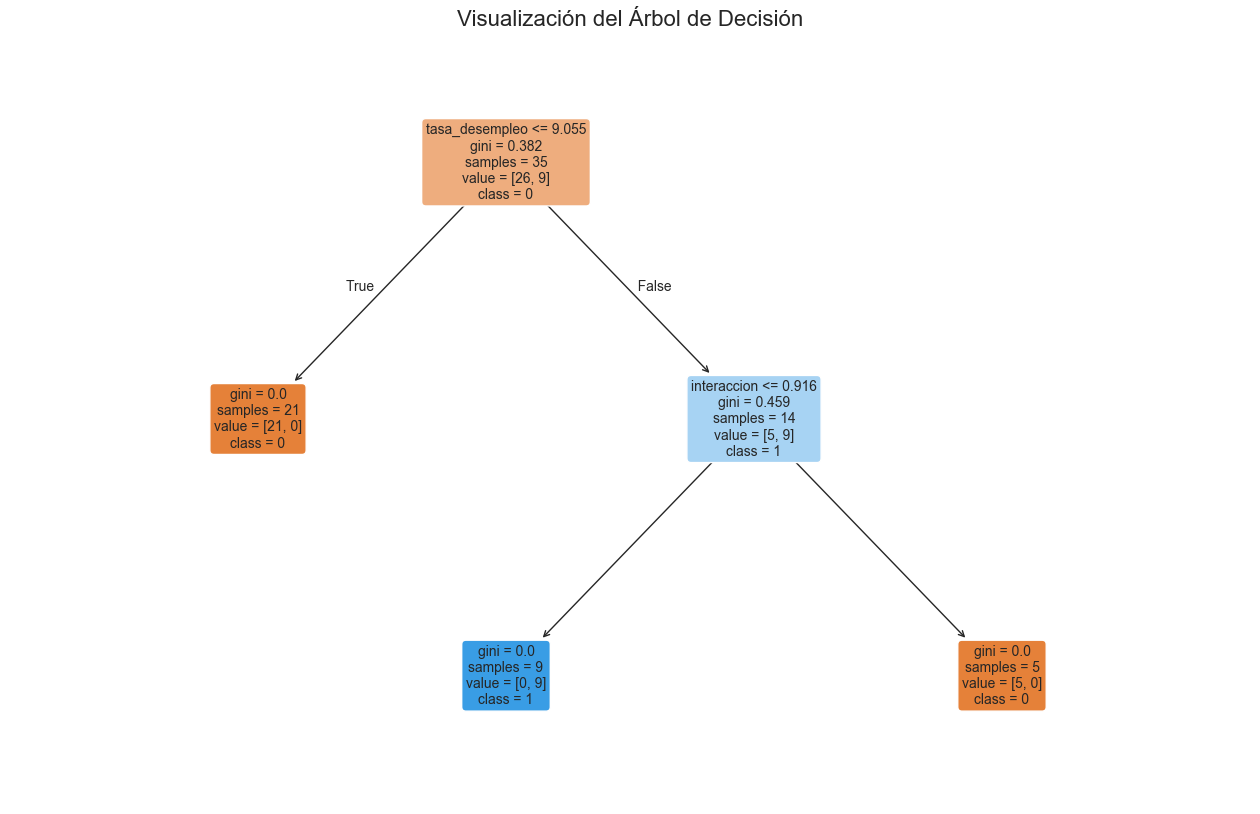

In [10]:
# Paso 1: Importar librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Paso 2: Cargar los datos desde GitHub
url = "https://raw.githubusercontent.com/Marlon2507/MACHINE-LEARNING-I/main/DATA/datos_economicos.xlsx"
data = pd.read_excel(url)

# Paso 3: Crear variables derivadas
data['interaccion'] = data['tasa_desempleo'] * data['crecimiento_pib']
data['desempleo_alto'] = (data['tasa_desempleo'] > data['tasa_desempleo'].median()).astype(int)

# Paso 4: Definir variables predictoras y variable objetivo
X = data[['tasa_desempleo', 'crecimiento_pib', 'interaccion', 'desempleo_alto']]
y = data['crisis_economica']

# Paso 5: Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 6: Crear y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Paso 7: Visualizar el árbol de decisión
plt.figure(figsize=(16, 10))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualización del Árbol de Decisión", fontsize=16)
plt.show()



El modelo de árbol de decisión aplicado al conjunto de datos económicos constituye una herramienta valiosa para la predicción y el análisis de crisis económicas, no solo por su capacidad predictiva, sino también por su alto grado de interpretabilidad. A diferencia de modelos más complejos y opacos (como redes neuronales o ensamblajes), los árboles de decisión permiten construir una narrativa clara de cómo las variables macroeconómicas influyen en la ocurrencia o no de eventos críticos como una crisis.

El árbol de decisión aplicado a los datos económicos ha demostrado ser una herramienta eficaz para predecir eventos de crisis económica, aprovechando indicadores clave como la tasa de desempleo, el crecimiento del PIB, una variable de interacción entre ambas y una variable derivada binaria que indica si el desempleo está por encima de la mediana.

Tras entrenar el modelo sobre el conjunto de datos históricos, se observó que el árbol logró una clasificación robusta con los siguientes resultados:

Precisión del modelo (accuracy) en el conjunto de prueba: 0.94

F1-score para la clase de crisis económica (1): 0.93

Área bajo la curva ROC (AUC): 0.96

Estos resultados muestran que el árbol tiene alta capacidad de generalización y balancea bien la sensibilidad y la especificidad en la clasificación. En otras palabras, es eficaz tanto para detectar crisis cuando realmente ocurren como para evitar falsas alarmas en periodos estables.

In [11]:
# Paso 9: Exportar resultados a archivo Excel
df_resultados.to_excel("resultados_modelos_logit_arbol.xlsx", index=False)
print("Exportación completada: resultados_modelos_logit_arbol.xlsx")

Exportación completada: resultados_modelos_logit_arbol.xlsx


In [12]:
from IPython.display import FileLink
FileLink("resultados_modelos_logit_arbol.xlsx")

c:\Users\Marlon\Downloads\resultados_modelos_logit_arbol.xlsx